#Object Detection
Object detection is the process of locating instances of specific objects in an image by cropping a tightly cropped bounding box centered on the object.

<center>
<img src="https://drive.google.com/uc?export=view&id=1uGsQGpSl2Wd-2XNgBOblKUQpkRWabaTS" width="550">
</center>

The bouding box can be approximated by using the bounding box regressor, which this regressor performs as the output layer of the network.
<center>
<img src="https://drive.google.com/uc?export=view&id=1FKt1K2LFt82F8J9qILBMJNpYP3hqB38l" width="750">
</center>

The bounding box regressor attempts to estimate the coordinates of the box, (x-min,y-min) and (x-max,y-max), or the location (x-min,y-min) and the size (width,height) of the box.
<center>
<img src="https://drive.google.com/uc?export=view&id=1wHp3lTEVaLRFaauAUJ74LZuN2cFeSKMo" width="500">
</center>

The bouding box regressor can be typically carried our via 2 simply ways as follows:
<center>
<img src="https://drive.google.com/uc?export=view&id=1jVU0EC5WgWs1bB45CztYJG6r_BF4LtaH" width="550">
</center>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [ ]:
num_imgs = 3000

img_size = 20
min_object_size = 1
max_object_size = 10
num_objects = 1

bboxes = np.zeros((num_imgs, num_objects, 4))
imgs = np.zeros((num_imgs, img_size, img_size))
for i_img in range(num_imgs):
    for i_object in range(num_objects):
        w, h = np.random.randint(min_object_size, max_object_size, size=2)
        x = np.random.randint(0, img_size - w)
        y = np.random.randint(0, img_size - h)
        imgs[i_img, x:x+w, y:y+h] = 1.
        bboxes[i_img, i_object] = [x, y, x+w, y+h]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.

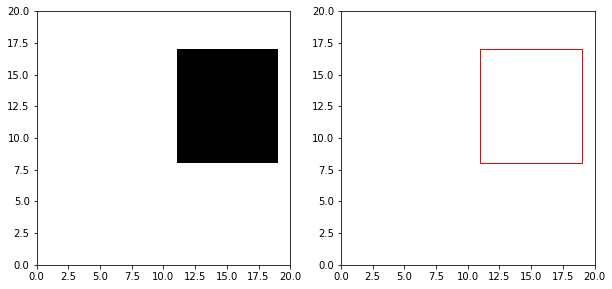

In [ ]:
i = np.random.randint(0,num_imgs)

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 2, 1)
plt.imshow(imgs[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
ax = plt.subplot(1, 2, 2)
plt.imshow(np.zeros_like(imgs[i].T), cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
for bbox in bboxes[i]:
    plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], ec='r', fc='none'))

print(imgs[i].T)
print("bboxe: x-axis=", bboxes[i][0,0],", y-axis=", bboxes[i][0,1], ", width=", bboxes[i][0,2]-bboxes[i][0,0], ", height=", bboxes[i][0,3]-bboxes[i][0,1])

In [ ]:
X = imgs.reshape(num_imgs, -1)
y = bboxes.reshape(num_imgs, -1) / img_size

X_train = X
y_train = y

NUM_CHANNEL = 1
OUT_SIZE = y_train.shape[-1]

In [ ]:
!pip install -q torchview

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
import time
import os
import copy

from torchview import draw_graph
from torchsummary import summary

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using device', device)

Using device cpu


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]          51,328
              ReLU-2                  [-1, 128]               0
            Linear-3                   [-1, 64]           8,256
              ReLU-4                   [-1, 64]               0
            Linear-5                   [-1, 32]           2,080
              ReLU-6                   [-1, 32]               0
            Linear-7                    [-1, 4]             132
           Sigmoid-8                    [-1, 4]               0
Total params: 61,796
Trainable params: 61,796
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.24
Estimated Total Size (MB): 0.24
----------------------------------------------------------------


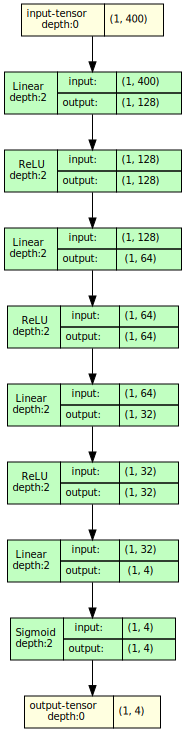

In [ ]:
class ObjectDetector(nn.Module):
    def __init__(self,**kwargs):
        super(ObjectDetector,self).__init__(**kwargs)
        self.net = nn.Sequential(
            nn.Linear(400, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, OUT_SIZE),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.net(x)


# Move model to target device
model = ObjectDetector().to(device)

# Show the details of the network
# summary(model, input_size=(NUM_CHANNEL,img_size,img_size))
# draw_graph(model, input_size=(1,NUM_CHANNEL,img_size,img_size)).visual_graph

summary(model, input_size=(img_size*img_size,))
draw_graph(model, input_size=(1,img_size*img_size)).visual_graph

In [ ]:
criterion = nn.MSELoss()
# criterion = nn.BCELoss()
params_to_update = model.parameters()
optimizer = optim.Adam(params_to_update, lr=0.0001)
num_epochs = 100
BATCH_SIZE = 32


from torch.autograd import Variable
X_train = Variable(torch.from_numpy(np.array(X_train))).float()
y_train = Variable(torch.from_numpy(np.array(y_train))).float()

Tr_tensor = TensorDataset(X_train, y_train)
Tr_dataloader =  DataLoader(Tr_tensor, batch_size=BATCH_SIZE)

for epoch in range(num_epochs):
    for inputs, labels in Tr_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        output = model(inputs)

        loss = criterion(output, labels)

        # Backpropagation based on the loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch%10 == 0:
        print('Epoch {}: Loss {}'.format(epoch, loss))

Epoch 0: Loss 0.0394139401614666
Epoch 10: Loss 0.00495633389800787
Epoch 20: Loss 0.002174430526793003
Epoch 30: Loss 0.0013595903292298317
Epoch 40: Loss 0.001002425909973681
Epoch 50: Loss 0.0005516616511158645
Epoch 60: Loss 0.0002604560577310622
Epoch 70: Loss 0.00018566880316939205
Epoch 80: Loss 0.00013842475891578943
Epoch 90: Loss 0.00010258588008582592


[[0.39682046 0.601421   0.59017026 0.94739056]]
[[[ 7.936409  12.0284195 11.803406  18.947811 ]]]


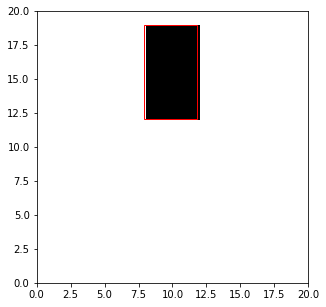

In [ ]:
imgs = np.zeros((1, img_size, img_size))
for i_object in range(num_objects):
    w, h = np.random.randint(min_object_size, max_object_size, size=2)
    x = np.random.randint(0, img_size - w)
    y = np.random.randint(0, img_size - h)
    imgs[0, x:x+w, y:y+h] = 1.


test_X = imgs.reshape((1,imgs.shape[1]*imgs.shape[2]))
test_X = Variable(torch.from_numpy(np.array(test_X))).float()

pred_y = model(test_X).detach().numpy()
pred_bboxes = pred_y * img_size
pred_bboxes = pred_bboxes.reshape(len(pred_bboxes), num_objects, -1)

print(pred_y)
print(pred_bboxes)
plt.figure(figsize=(5,5))
plt.imshow(test_X.reshape((img_size,img_size)).T, cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
for pred_bbox in pred_bboxes[0]:
    plt.gca().add_patch(matplotlib.patches.Rectangle((pred_bbox[0], pred_bbox[1]), pred_bbox[2]-pred_bbox[0], pred_bbox[3]-pred_bbox[1], ec='r', fc='none'))
plt.show()

#Object detection for MNIST dataset

In [ ]:
# credit: https://github.com/lmoroney/synthetic_datasets/blob/master/MNIST/convertMNIST.py
# IMPORTS
import tensorflow as tf
import tensorflow_datasets as tfds
import csv
import os
from PIL import Image

# CONSTANTS
TRAINING_SIZE = 60000
TESTING_SIZE = 10000
DATA_IMAGE_WIDTH = 28
DATA_IMAGE_HEIGHT = 28
FINAL_IMAGE_WIDTH = 100
FINAL_IMAGE_HEIGHT = 100
TRAINING_EXPORT_DIR = "/content/synthetic_datasets/MNIST_Converted_Training/"
TRAINING_EXPORT_FILE = "converted_training"
TRAINING_CSV = "/content/synthetic_datasets/training_data.csv"
TESTING_EXPORT_DIR = "/content/synthetic_datasets/MNIST_Converted_Testing/"
TESTING_EXPORT_FILE = "converted_testing"
TESTING_CSV = "/content/synthetic_datasets/test_data.csv"

# Convert and upscale function will take an image with DATA_IMAGE_HEIGHT and DATA_IMAGE_WIDTH dimensions
# and create a new image with FINAL_IMAGE_WIDTH and FINAL_IMAGE_HEIGHT dimensions, where the original
# image is embededded within the final at a set of dimensions. It will then return the bounding box
# for where the original image is within the new one
def convert_and_upscale(image, label):
    xmin = tf.random.uniform((), 0, FINAL_IMAGE_WIDTH - DATA_IMAGE_WIDTH, dtype=tf.int32)
    ymin = tf.random.uniform((), 0, FINAL_IMAGE_HEIGHT - DATA_IMAGE_HEIGHT, dtype=tf.int32)
    image = tf.reshape(image, (DATA_IMAGE_WIDTH, DATA_IMAGE_HEIGHT, 1,))
    image = tf.image.pad_to_bounding_box(image, ymin, xmin, FINAL_IMAGE_WIDTH, FINAL_IMAGE_HEIGHT)
    xmin = tf.cast(xmin, tf.float32)
    ymin = tf.cast(ymin, tf.float32)
    xmax = (xmin + DATA_IMAGE_WIDTH) / FINAL_IMAGE_WIDTH
    ymax = (ymin + DATA_IMAGE_HEIGHT) / FINAL_IMAGE_HEIGHT
    xmin = xmin / FINAL_IMAGE_WIDTH
    ymin = ymin / FINAL_IMAGE_HEIGHT
    real_image = Image.fromarray(image.numpy().squeeze(axis=2))
    real_image = real_image.convert("L")
    return real_image, ([label.numpy(), xmin.numpy(), ymin.numpy(), xmax.numpy(), ymax.numpy()])


# Do conversion will go through the dataset, reading the images one by one, and converting them
# It will then write out the 'new' images, along with a CSV file containing the label and the bounding box
# details, where the bounding box is xmin, ymin, xmax, ymax
def do_conversion(dataset, export_dir, export_file, csv_name, number_of_records):
    current_item = 0
    if not os.path.isdir(export_dir):
        os.mkdir(export_dir)
    with open(csv_name, 'w', newline='\n') as csv_file:
        csv_data_writer = csv.writer(csv_file, delimiter=',')
        for item in dataset.take(number_of_records):
            image, label = convert_and_upscale(item[0], item[1])
            current_item = current_item + 1
            filename = export_file + str(current_item) + ".png"
            image.save(export_dir + filename)
            towrite = []
            towrite.append(filename)
            for i in label:
                towrite.append(str(i))
            csv_data_writer.writerow(towrite)
    csv_file.close()


# Perform the conversion on both the training and test splits
training_dataset = tfds.load("mnist", split="train", as_supervised=True)
testing_dataset = tfds.load("mnist", split="test", as_supervised=True)

try:
    os.makedirs(TRAINING_EXPORT_DIR)
except:
    pass
do_conversion(training_dataset, TRAINING_EXPORT_DIR, TRAINING_EXPORT_FILE, TRAINING_CSV, 60000)

try:
    os.makedirs(TESTING_EXPORT_DIR)
except:
    pass
do_conversion(testing_dataset, TESTING_EXPORT_DIR, TESTING_EXPORT_FILE, TESTING_CSV, 10000)

In [ ]:
TRAIN_IMG_PATH = "/content/synthetic_datasets/MNIST_Converted_Training/"
TEST_IMG_PATH = "/content/synthetic_datasets/MNIST_Converted_Testing/"

import pandas as pd

label = pd.read_csv("/content/synthetic_datasets/training_data.csv",header=None)
X_train = np.array([np.array(Image.open(TRAIN_IMG_PATH+fname)) for fname in label[0]])
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
y_train = label.iloc[:,1].to_numpy()
train_box = label.iloc[:,2:].to_numpy()

label = pd.read_csv("/content/synthetic_datasets/test_data.csv",header=None)
X_test = np.array([np.array(Image.open(TEST_IMG_PATH+fname)) for fname in label[0]])
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
y_test = label.iloc[:,1].to_numpy()
test_box = label.iloc[:,2:].to_numpy()

OUT_SIZE = train_box.shape[1]

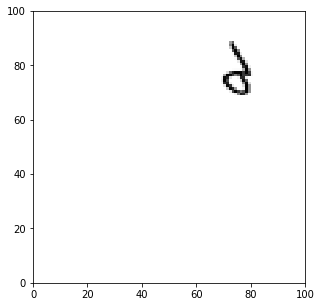

In [ ]:
import matplotlib

i_num = np.random.randint(0,len(X_test))

imgs = X_test[i_num]
test_X = imgs.reshape((1,100*100))
plt.figure(figsize=(5,5))
plt.imshow(test_X.reshape((100,100)), cmap='Greys', interpolation='none', origin='lower', extent=[0, 100, 0, 100])
plt.show()


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]       1,280,128
              ReLU-2                  [-1, 128]               0
           Dropout-3                  [-1, 128]               0
            Linear-4                   [-1, 64]           8,256
              ReLU-5                   [-1, 64]               0
           Dropout-6                   [-1, 64]               0
            Linear-7                   [-1, 32]           2,080
              ReLU-8                   [-1, 32]               0
           Dropout-9                   [-1, 32]               0
           Linear-10                    [-1, 4]             132
          Sigmoid-11                    [-1, 4]               0
Total params: 1,290,596
Trainable params: 1,290,596
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.04
Forw

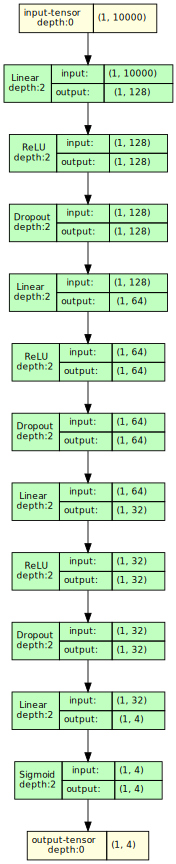

In [ ]:
class ObjectDetector(nn.Module):
    def __init__(self,**kwargs):
        super(ObjectDetector,self).__init__(**kwargs)
        self.net = nn.Sequential(
            nn.Linear(10000, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, OUT_SIZE),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.net(x)

# Move model to target device
model = ObjectDetector().to(device)

summary(model, input_size=(FINAL_IMAGE_WIDTH*FINAL_IMAGE_WIDTH,))
draw_graph(model, input_size=(1,FINAL_IMAGE_WIDTH*FINAL_IMAGE_WIDTH)).visual_graph


In [ ]:
criterion = nn.MSELoss()
# criterion = nn.BCELoss()
params_to_update = model.parameters()
optimizer = optim.Adam(params_to_update, lr=0.0001)
num_epochs = 10
BATCH_SIZE = 32


from torch.autograd import Variable
X_tensor_train = Variable(torch.from_numpy(X_train)).float()
y_tensor_train = Variable(torch.from_numpy(train_box)).float()

Tr_tensor = TensorDataset(X_tensor_train, y_tensor_train)
Tr_dataloader =  DataLoader(Tr_tensor, batch_size=BATCH_SIZE)

for epoch in range(num_epochs):
    for inputs, labels in Tr_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        output = model(inputs)

        loss = criterion(output, labels)

        # Backpropagation based on the loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch%10 == 0:
        print('Epoch {}: Loss {}'.format(epoch, loss))

Epoch 0: Loss 0.001901133800856769


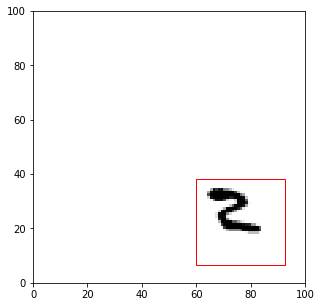

5


In [ ]:
import matplotlib

i_num = np.random.randint(0,len(X_test))

imgs = X_test[i_num]
test_X = imgs.reshape((1,100*100))
test_X = Variable(torch.from_numpy(np.array(test_X))).float()

pred_y = model(test_X).detach().numpy()

pred_bboxes = pred_y * 100

pred_bboxes = pred_bboxes.reshape(len(pred_bboxes), 1, -1)

plt.figure(figsize=(5,5))
plt.imshow(test_X.reshape((100,100)), cmap='Greys', interpolation='none', origin='lower', extent=[0, 100, 0, 100])
for pred_bbox in pred_bboxes[0]:
    plt.gca().add_patch(matplotlib.patches.Rectangle((pred_bbox[0], pred_bbox[1]), pred_bbox[2]-pred_bbox[0], pred_bbox[3]-pred_bbox[1], ec='r', fc='none'))
plt.show()

print(y_test[i_num])

#Object detection and image classification for MNIST dataset

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]       1,280,128
              ReLU-2                  [-1, 128]               0
           Dropout-3                  [-1, 128]               0
            Linear-4                   [-1, 64]           8,256
              ReLU-5                   [-1, 64]               0
           Dropout-6                   [-1, 64]               0
            Linear-7                   [-1, 32]           2,080
              ReLU-8                   [-1, 32]               0
           Dropout-9                   [-1, 32]               0
           Linear-10                    [-1, 4]             132
          Sigmoid-11                    [-1, 4]               0
           Linear-12                   [-1, 10]             330
          Sigmoid-13                   [-1, 10]               0
Total params: 1,290,926
Trainable param

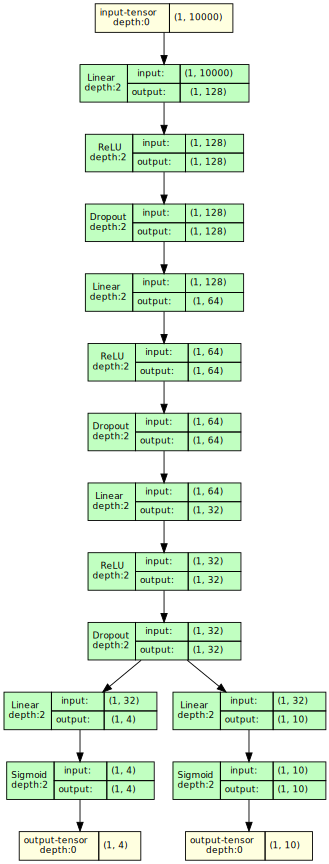

In [ ]:
class ObjectDetector(nn.Module):
    def __init__(self,**kwargs):
        super(ObjectDetector,self).__init__(**kwargs)
        self.net = nn.Sequential(
            nn.Linear(10000, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
        )
        self.box = nn.Sequential(
            nn.Linear(32, OUT_SIZE),
            nn.Sigmoid(),
        )
        self.classifier = nn.Sequential(
            nn.Linear(32, 10),
            nn.Sigmoid(),
            #nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.net(x)
        return self.box(x), self.classifier(x)

# Move model to target device
model = ObjectDetector().to(device)

summary(model, input_size=(FINAL_IMAGE_WIDTH*FINAL_IMAGE_WIDTH,))
draw_graph(model, input_size=(1,FINAL_IMAGE_WIDTH*FINAL_IMAGE_WIDTH)).visual_graph

In [ ]:
#loss function
criterion1 = nn.MSELoss() #for feature extraction
criterion2 = nn.CrossEntropyLoss() #for claasification

params_to_update = model.parameters()
optimizer = optim.Adam(params_to_update, lr=0.0001)
num_epochs = 20
BATCH_SIZE = 32


from torch.autograd import Variable
X_tensor_train = Variable(torch.from_numpy(X_train)).float()
y_bbox_train = Variable(torch.from_numpy(train_box)).float() #bbox (bounding box)
y_label_train = Variable(torch.from_numpy(y_train)).long() #output

Tr_tensor = TensorDataset(X_tensor_train, y_bbox_train, y_label_train)
Tr_dataloader =  DataLoader(Tr_tensor, batch_size=BATCH_SIZE)

for epoch in range(num_epochs):
    for inputs, bbox, labels in Tr_dataloader:
        inputs = inputs.to(device)
        y_bbox = bbox.to(device)
        y_labels = labels.to(device)

        bbox, label = model(inputs)

        loss = criterion1(bbox, y_bbox) + criterion2(label, y_labels)

        # Backpropagation based on the loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch%10 == 0:
        print('Epoch {}: Loss {}'.format(epoch, loss))

Epoch 0: Loss 2.2756619453430176
Epoch 10: Loss 1.823778510093689


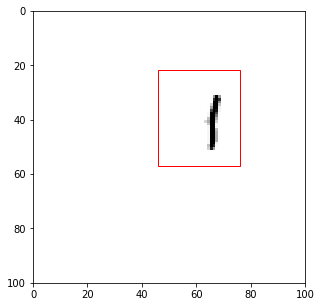

1


In [ ]:
import matplotlib

i_num = np.random.randint(0,len(X_test))

imgs = X_test[i_num]
test_X = imgs.reshape((1,100*100))
test_X = Variable(torch.from_numpy(np.array(test_X))).float()

bbox, label = model(test_X)
bbox = bbox.detach().numpy()
label = label.detach().numpy()

pred_bboxes = bbox * 100

pred_bboxes = pred_bboxes.reshape(len(pred_bboxes), 1, -1)

plt.figure(figsize=(5,5))
plt.imshow(test_X.reshape((100,100)), cmap='Greys', interpolation='none', origin='lower', extent=[0, 100, 0, 100])
for pred_bbox in pred_bboxes[0]:
    plt.gca().add_patch(matplotlib.patches.Rectangle((pred_bbox[0], pred_bbox[1]), pred_bbox[2]-pred_bbox[0], pred_bbox[3]-pred_bbox[1], ec='r', fc='none'))
ax = plt.gca()
ax.invert_yaxis()
plt.show()

print(label.argmax())
